In [10]:
using AlgebraicPetri
using AlgebraicPetri.ModelComparison
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.Programs
using Catlab.WiringDiagrams
using Catlab.Graphics.Graphviz
using Catlab.Graphics.Graphviz: Html
using Plots
using JSON
using LabelledArrays
using PrettyTables
using Catlab.WiringDiagrams, Catlab.Graphics
using OrdinaryDiffEq


using GraphViz

LoadError: ArgumentError: Package OrdinaryDiffEq not found in current path.
- Run `import Pkg; Pkg.add("OrdinaryDiffEq")` to install the OrdinaryDiffEq package.

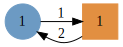

In [4]:
birth_petri = Open(PetriNet(1, 1=>(1,1)));
Graph(birth_petri)

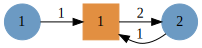

In [5]:
predation_petri = Open(PetriNet(2, (1,2)=>(2,2)));
Graph(predation_petri)

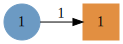

In [6]:
death_petri = Open(PetriNet(1, 1=>()));
Graph(death_petri)

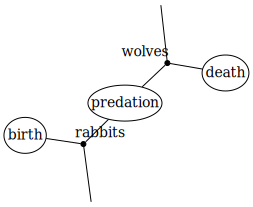

In [7]:
display_uwd(ex) = to_graphviz(ex, box_labels=:name, junction_labels=:variable, edge_attrs=Dict(:len=>".75"));


lotka_volterra = @relation (wolves, rabbits) begin
  birth(rabbits)
  predation(rabbits, wolves)
  death(wolves)
end
display_uwd(lotka_volterra)

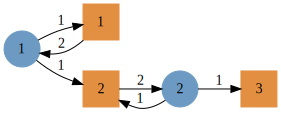

In [8]:
lv_dict = Dict(:birth=>birth_petri, :predation=>predation_petri, :death=>death_petri);
lotka_petri = apex(oapply(lotka_volterra, lv_dict))
Graph(lotka_petri)

In [9]:
"""
See https://diffeq.sciml.ai/stable/types/ode_types/
f: The function in the ODE.
u0: The initial condition.
tspan: The timespan for the problem.
p: The parameters.
kwargs: The keyword arguments passed onto the solves.
"""



u0 = [100, 10];
p = [.3, .015, .7];
prob = ODEProblem(vectorfield(lotka_petri),u0,(0.0,100.0),p);
sol = solve(prob,Tsit5(),abstol=1e-8);
plot(sol)

LoadError: UndefVarError: ODEProblem not defined

In [66]:
# Hand rolled with names

test = LabelledPetriNet()
add_parts!(test, :S, 2, sname=[Symbol("rabbits"), Symbol("wolves")])
add_parts!(test, :T, 3, tname=[Symbol("birth"), Symbol("predation"), Symbol("death")])

# birth
add_parts!(test, :I, 1, is=1, it=1)
add_parts!(test, :O, 1, os=1, ot=1)
add_parts!(test, :O, 1, os=1, ot=1)


# death
add_parts!(test, :I, 1, is=2, it=3)


# predation
add_parts!(test, :I, 1, is=2, it=2)
add_parts!(test, :O, 1, os=2, ot=2)
add_parts!(test, :O, 1, os=2, ot=2)
add_parts!(test, :I, 1, is=1, it=2)



# add_parts!(model, :I, 1, is=1, it=1) # hello => sunny


4:4

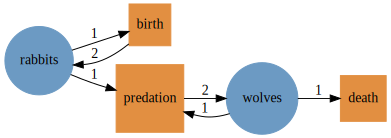

In [67]:
Graph(test)

In [157]:
my_u0 = [100, 10];
my_p = [.3, .015, .7];

temp = PetriNet(test)

my_prob = ODEProblem(vectorfield(temp), my_u0, (0.0, 100.0), my_p);

In [158]:
my_sol = solve(my_prob, Tsit5(), abstol=1e-8);

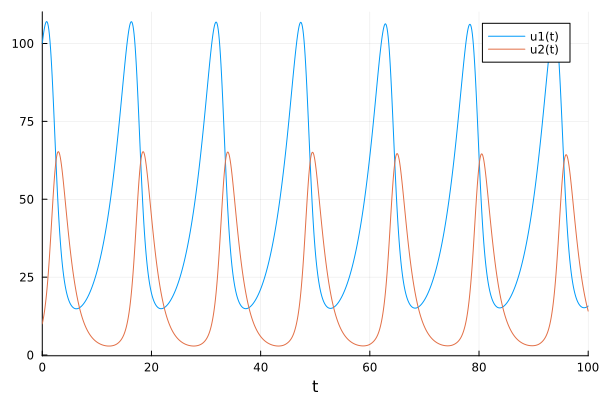

In [159]:
plot(my_sol)

In [170]:
size(my_sol.u)

(74,)

In [171]:
test.subparts.sname

2-element Vector{Symbol}:
 :rabbits
 :wolves